# FYS-STK4155 - Project 1 Notebook

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
plt.rcParams.update({'text.usetex': True, 'font.size': 16, 'font.family': 'serif', 'font.serif': 'Computer Modern Sans Serif', 'font.weight': 100, 'mathtext.fontset': 'cm', 'xtick.labelsize': 14, 'ytick.labelsize': 14})

# seed = np.random.randint(1,1000)
seed = 42
np.random.seed(seed)

## a)

In [2]:
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

def MSE(y, y_tilde):
    n = len(y)
    return np.sum((y - y_tilde)**2) / n

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model)**2) / np.sum((y_data - np.mean(y_data))**2)

def create_X(x, y, n):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X

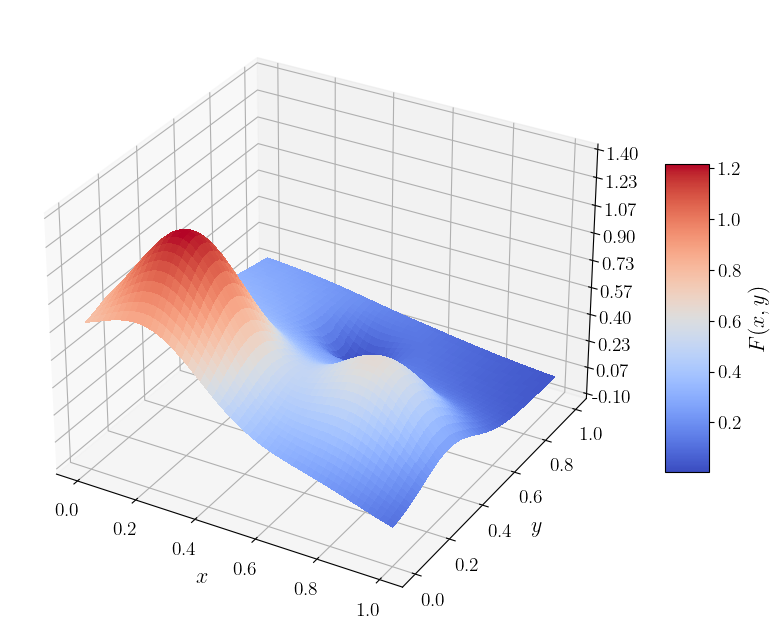

In [3]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(projection="3d")

n = 5
N = 2000
x = np.arange(0, 1, 1/N)
y = np.arange(0, 1, 1/N)
x, y = np.meshgrid(x,y)

z = FrankeFunction(x, y)
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
fig.colorbar(surf, shrink=0.5, aspect=7, label=r"$F(x,y)$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
plt.savefig("../figs/a_Franke_surf.pdf")
plt.show()

In [37]:
N = 1000
x = np.arange(0, 1, 1/N).reshape(-1, 1) 
y = np.arange(0, 1, 1/N).reshape(-1, 1)
z = FrankeFunction(x, y) + np.random.normal(0, 0.1, (N, N))

MSE_raw = []
MSE_scaled = []
R2_raw = []
R2_scaled = []
β_raw_list = []
β_scaled_list = []

degrees = range(1, 6)
for degree in degrees:
    X = create_X(x, y, n=degree)
    X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2, random_state=seed)

    # Raw
    β_raw = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train
    β_raw_list.append(β_raw)
    y_tilde_raw = X_train @ β_raw 
    y_pred_raw = X_test @ β_raw
    
    MSE_raw.append(MSE(y_test, y_pred_raw))
    R2_raw.append(R2(y_test, y_pred_raw))
    
    # Scaled
    scaler_X = StandardScaler().fit(X_train)
    X_train_scaled = scaler_X.transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    y_train_scaled = scaler_y.transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    β_scaled = np.linalg.pinv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train_scaled
    β_scaled_list.append(β_scaled)
    y_tilde_scaled = X_train_scaled @ β_scaled 
    y_pred_scaled = X_test_scaled @ β_scaled
    
    MSE_scaled.append(MSE(y_train_scaled, y_tilde_scaled))
    R2_scaled.append(R2(y_test_scaled, y_pred_scaled))

MSE(R2_raw, R_scaled) = 4.22e-11


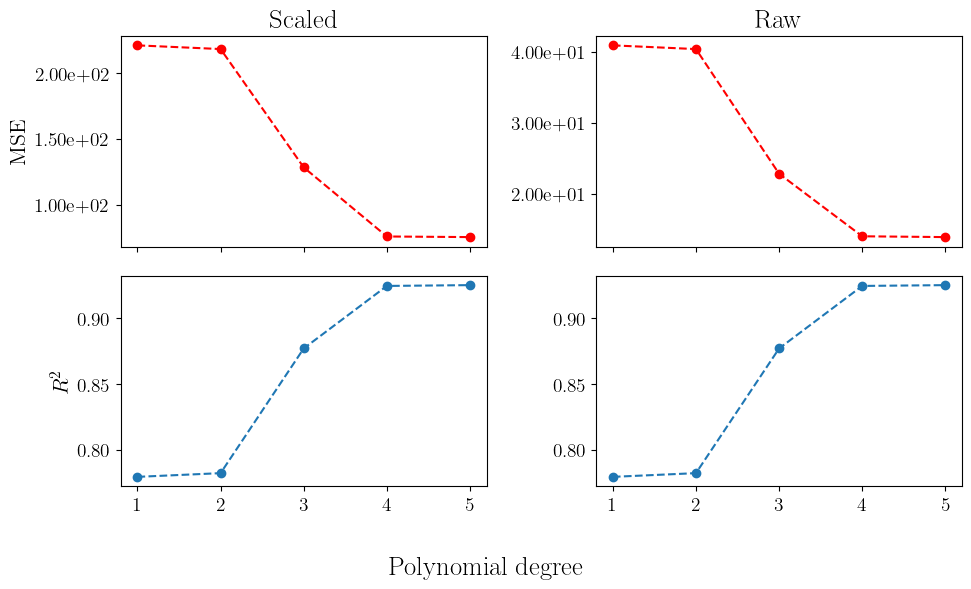

In [38]:
fig, (ax1, ax2) = plt.subplots(2, 2, sharex=True, figsize = (10, 6))

# Plotting in grid
ax1[0].plot(degrees, MSE_scaled, "r--o")
ax1[0].set_title("Scaled")

ax1[1].plot(degrees, MSE_raw, "r--o")
ax1[1].set_title("Raw")

ax2[0].plot(degrees, R2_scaled, "--o")
ax2[1].plot(degrees, R2_raw, "--o")

print(f'MSE(R2_raw, R_scaled) = {MSE(np.array(R2_raw), np.array(R2_scaled)):.2e}') # Almost equal

# Prettifying
## Formatting y-labels
ax1[0].yaxis.set_major_formatter(FormatStrFormatter("%.2e"))
ax1[1].yaxis.set_major_formatter(FormatStrFormatter("%.2e"))

ax2[0].yaxis.set_major_formatter(FormatStrFormatter("%.2f%%"))
ax2[1].yaxis.set_major_formatter(FormatStrFormatter("%.2f%%"))

## Axis labels
ax1[0].set_ylabel('MSE')
ax2[0].set_ylabel(r'$R^2$')
fig.supxlabel('Polynomial degree')

# plt.suptitle("Comparing Error in Scaled and Raw Data")
plt.tight_layout()
plt.savefig("../figs/a_error_scaled_vs_raw.pdf")
plt.show()

In [6]:
#TODO update comments after fixed MSE func

### Comment on Plot
- We get less errors with scaled data, by three orders of magnitude. 
- MSE is very low until we reach 4th degree polynomial for the scaled data, while for the unscaled data it is low until we reach 5th degree polynomial.
- The R2 score increases with the degree of the polynomial for both scaled and unscaled data, and have a MSE ∝ $10^{-11}$

MSE between first and last row:  8.59e-05
MSE between first and last row:  8.48e-04
MSE between first and last row:  1.28e-03
MSE between first and last row:  1.77e-02
MSE between first and last row:  4.37e+00


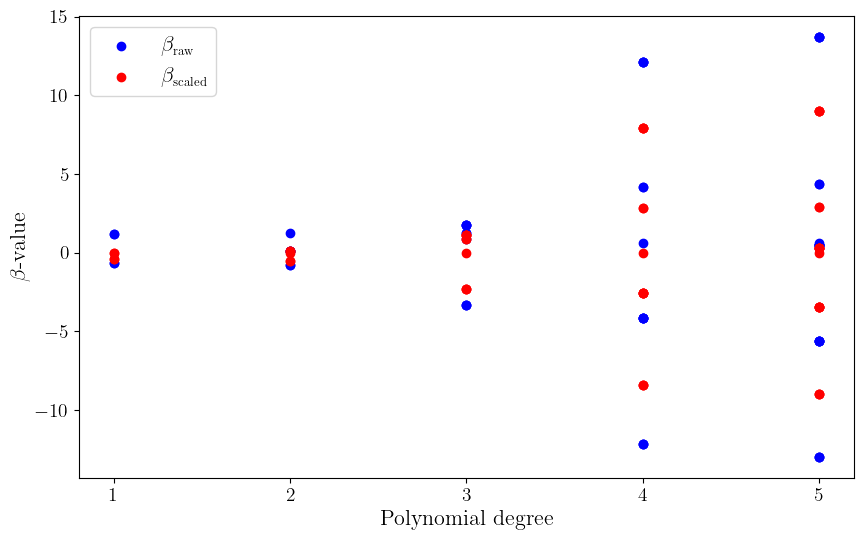

In [7]:
plt.figure(figsize = (10, 6))
for i, deg in enumerate(degrees):
    diff = MSE(β_raw_list[i][:, 0], β_raw_list[i][:, -1]) # Comparing first and last row
    print(f'MSE between first and last row: {diff: .2e}')
    m = len(β_raw_list[i][:, 0]) # Choice of row in β makes basically no difference
    plt.scatter([deg]*m, β_raw_list[i][:, 0], c='blue')
    plt.scatter([deg]*m, β_scaled_list[i][:, 0], c='red')

# Single data point for labels
plt.scatter(1, β_raw_list[0][0, 0], c='blue', label=r"$\beta_{\small\textrm{raw}}$")
plt.scatter(1, β_scaled_list[0][0, 0], c='red', label=r"$\beta_{\small\textrm{scaled}}$")

#TODO - or + in exponent?
# plt.title(r"First Column of $\beta$-values for Scaled and Raw Data" + "\n" + r"Negligible MSE $\propto 10^{-5\pm1}$ Between Columns")
plt.xlabel("Polynomial degree")
plt.ylabel(r'$\beta$-value')
plt.xticks([i for i in degrees], [str(i) for i in degrees])
plt.legend()
plt.savefig("../figs/a_beta_scaled_vs_raw.pdf")
plt.show()

### Comment on Plot
- As we increase the degree of the polynomial, we see a wider range of $β$-values. 
- The scaled values are consistently tighter in spread than the raw values.
- There are a small difference in β-values in each row of the β-matrices, but the difference is non significant.
- Difference in β-values from each row is most likely due to the use of pseudo-inverse in the OLS estimation.

#### Open Questions
- What does this mean for the model?
- Is pinv the cause of the difference in β-values?

## b)

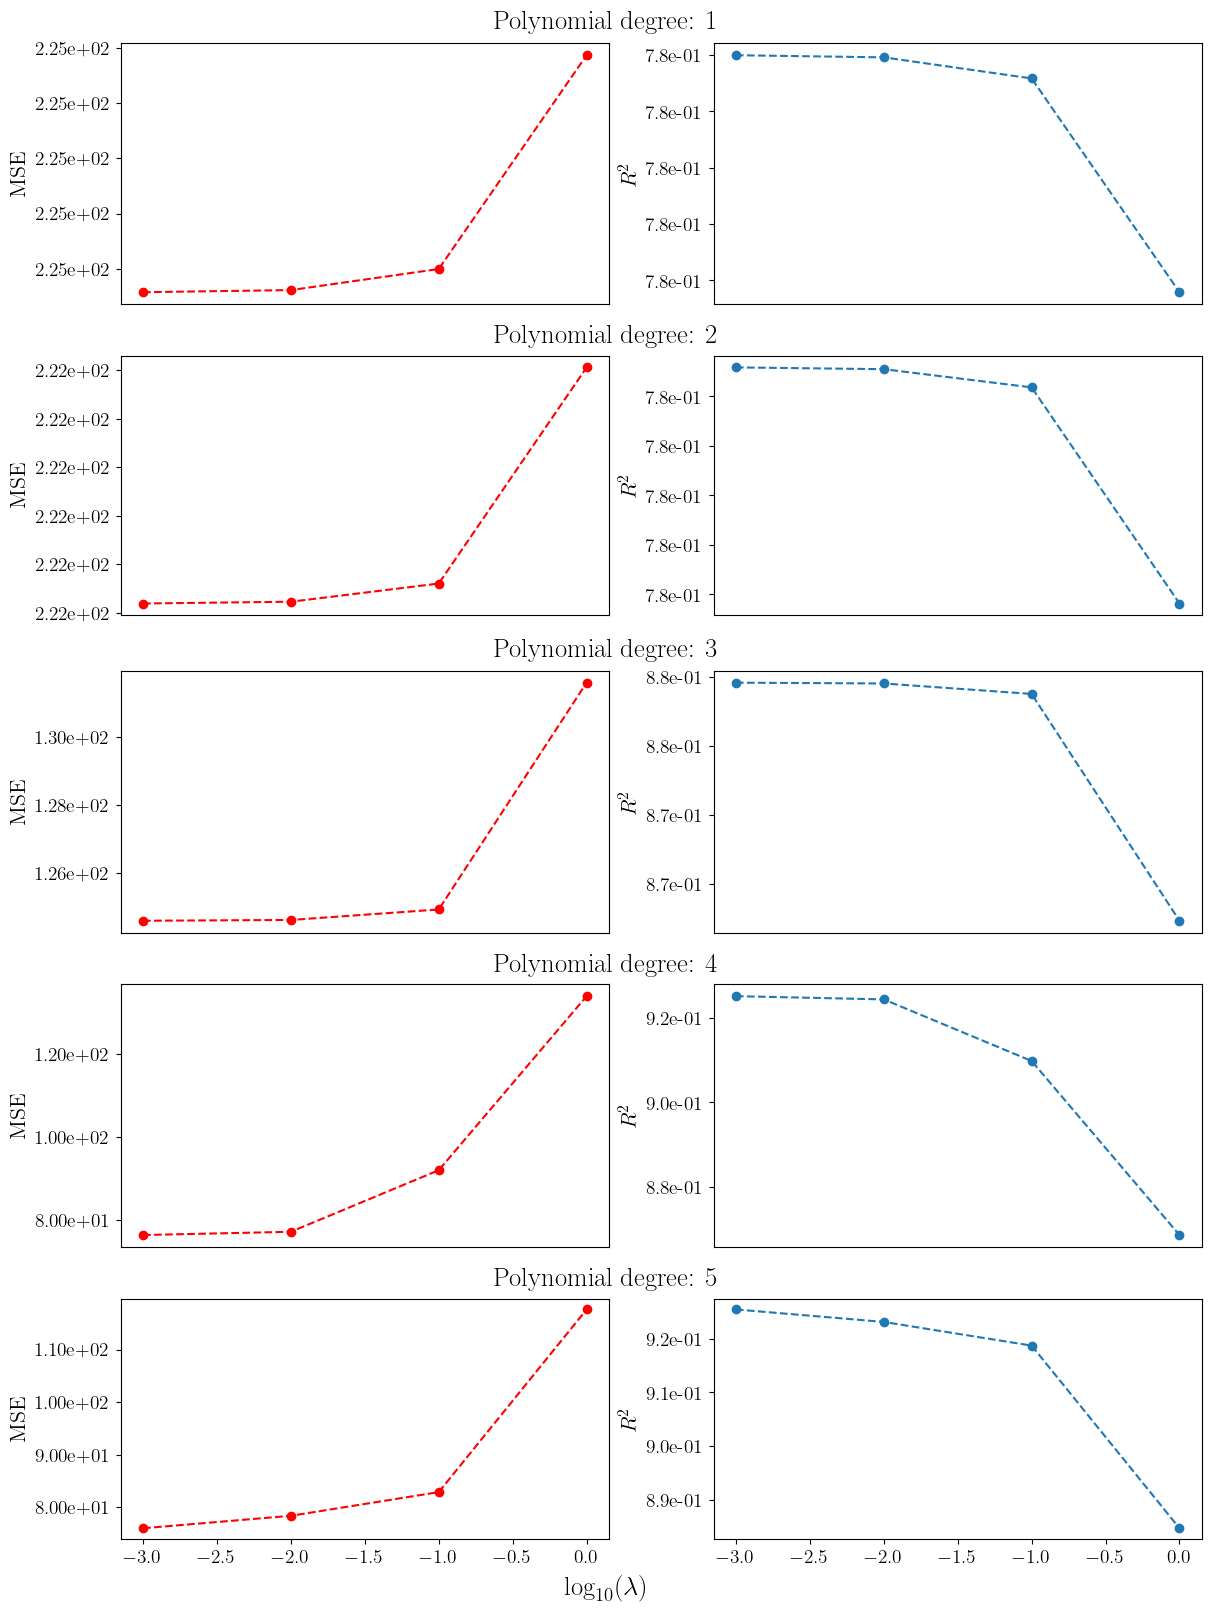

In [39]:
N = 1000
x = np.arange(0, 1, 1/N).reshape(-1, 1) 
y = np.arange(0, 1, 1/N).reshape(-1, 1)
z = FrankeFunction(x, y) + np.random.normal(0, 0.1, (N, N))

lambdas = [0.001, 0.01, 0.1, 1.0]
degrees = range(1, 6)

MSE_ridge_scaled = np.zeros([len(degrees), len(lambdas)])
R2_ridge_scaled = np.zeros([len(degrees), len(lambdas)])
β_ridge_scaled_list = np.zeros([len(degrees), len(lambdas)])

fig = plt.figure(figsize=(12,16), constrained_layout=True)
subfigs = fig.subfigures(5, 1)

for i in range(len(degrees)):
    X = create_X(x, y, n=degrees[i])
    X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2, random_state=seed)
    
    # Scaling the data
    scaler_X = StandardScaler().fit(X_train)
    X_train_scaled = scaler_X.transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    y_train_scaled = scaler_y.transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    for j in range(len(lambdas)):
        β_scaled = np.linalg.pinv(X_train_scaled.T @ X_train_scaled + lambdas[j]*np.eye(X_train.shape[1])) @ X_train_scaled.T @ y_train_scaled
        # β_ridge_scaled_list[i,j] = β_scaled
        y_tilde_scaled = X_train_scaled @ β_scaled 
        y_pred_scaled = X_test_scaled @ β_scaled
        
        MSE_ridge_scaled[i,j] = MSE(y_test_scaled, y_pred_scaled)
        R2_ridge_scaled[i,j] = R2(y_test_scaled, y_pred_scaled)

    subfig = subfigs[i]
    axs = subfig.subplots(1, 2)
    axs[0].plot(np.log10(lambdas), MSE_ridge_scaled[i],  'r--o', label=f'MSE Ridge Polynomial {degrees[i]}')
    axs[1].plot(np.log10(lambdas), R2_ridge_scaled[i],  '--o', label=r'$R^2$ ' + f'Ridge Polynomial {degrees[i]}')

    subfig.suptitle(f'Polynomial degree: {degrees[i]}')
    axs[0].yaxis.set_major_formatter(FormatStrFormatter("%.2e"))
    axs[1].yaxis.set_major_formatter(FormatStrFormatter("%.1e%%"))

    axs[0].set_ylabel('MSE')
    axs[1].set_ylabel(r'$R^2$')

    if i != len(degrees) - 1:
        axs[0].set_xticks([])
        axs[1].set_xticks([])

fig.supxlabel(r'$\log_{10}(\lambda)$')
plt.savefig("../figs/b_MSE_R2_vert.pdf")
plt.show()

In [9]:
#TODO update conclusions after fixed MSE func

### Conclusions
- Increasing the polynomial degree increases the error. For discussion, the difference is almost negligible to the point of chalking it up to rounding errors.
- Increasing the lambda, decreases the error. It is noted for the first and second order polynomial this does not stand
- There is no obvious trend to observe in the different lambdas. Our inital theory comes from rounding error here as well

### Open questions
- Increase amount and range of lambda

## c)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.124e+01, tolerance: 8.000e-02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.128e+01, tolerance: 8.000e-02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

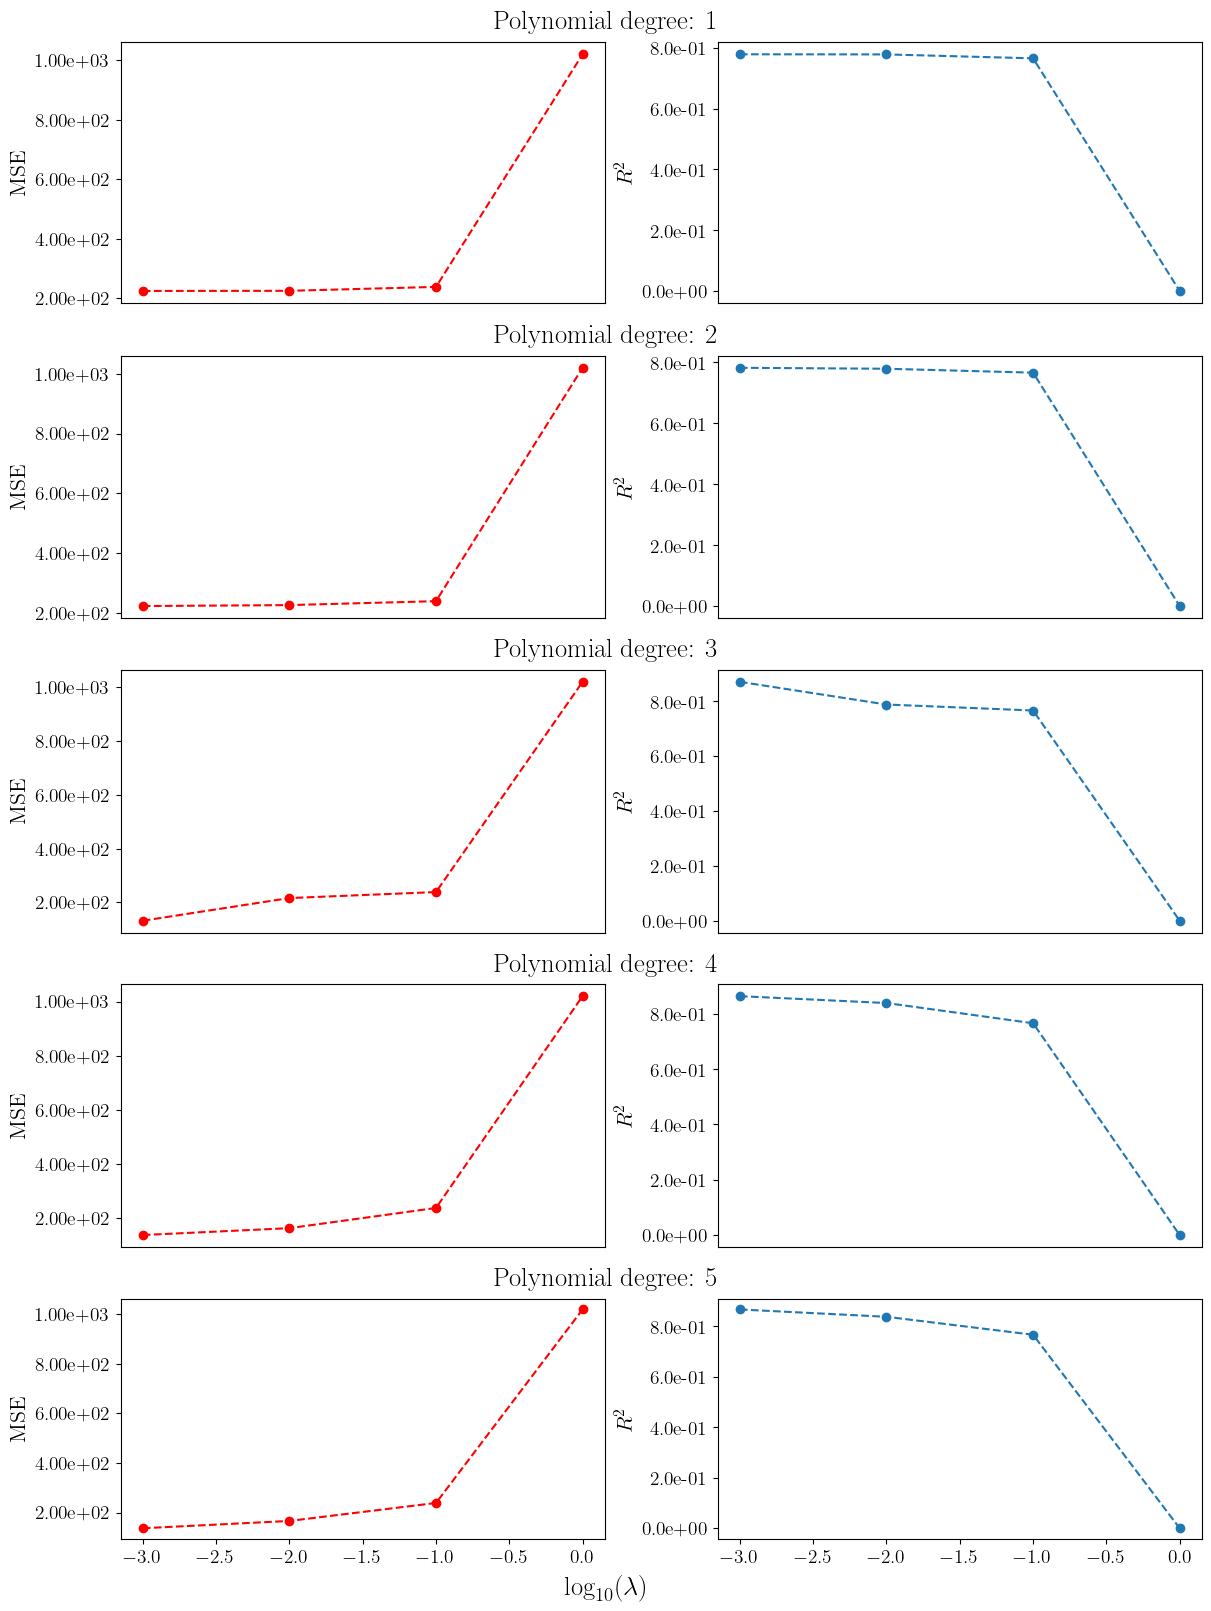

In [40]:
N = 1000
x = np.arange(0, 1, 1/N).reshape(-1, 1) 
y = np.arange(0, 1, 1/N).reshape(-1, 1)
z = FrankeFunction(x, y) + np.random.normal(0, 0.1, (N, N))

lambdas = [0.001, 0.01, 0.1, 1.0]
degrees = range(1, 6)

MSE_lasso_scaled = np.zeros([len(degrees), len(lambdas)])
R2_lasso_scaled = np.zeros([len(degrees), len(lambdas)])
β_lasso_scaled_list = np.zeros([len(degrees), len(lambdas)])

fig = plt.figure(figsize=(12,16), constrained_layout=True)
subfigs = fig.subfigures(5, 1)

for i in range(len(degrees)):
    X = create_X(x, y, n=degrees[i])
    X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2, random_state=seed)
    
    # Scaling the data
    scaler_X = StandardScaler().fit(X_train)
    X_train_scaled = scaler_X.transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    y_train_scaled = scaler_y.transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    for j in range(len(lambdas)):
        RegLasso = linear_model.Lasso(lambdas[j], fit_intercept=True)
        RegLasso.fit(X_train_scaled, y_train_scaled)
        y_tilde_lasso = RegLasso.predict(X_train_scaled)
        y_pred_lasso = RegLasso.predict(X_test_scaled)

        MSE_lasso_scaled[i,j] = MSE(y_test_scaled, y_pred_lasso)
        R2_lasso_scaled[i,j] = R2(y_test_scaled, y_pred_lasso)

    subfig = subfigs[i]
    axs = subfig.subplots(1, 2)
    axs[0].plot(np.log10(lambdas), MSE_lasso_scaled[i],  'r--o', label=f'MSE Lasso Polynomial {degrees[i]}')
    axs[1].plot(np.log10(lambdas), R2_lasso_scaled[i],  '--o', label=r'$R^2$ ' + f'Lasso Polynomial {degrees[i]}')

    subfig.suptitle(f'Polynomial degree: {degrees[i]}')
    axs[0].yaxis.set_major_formatter(FormatStrFormatter("%.2e"))
    axs[1].yaxis.set_major_formatter(FormatStrFormatter("%.1e%%"))

    axs[0].set_ylabel('MSE')
    axs[1].set_ylabel(r'$R^2$')

    if i != len(degrees) - 1:
        axs[0].set_xticks([])
        axs[1].set_xticks([])

fig.supxlabel(r'$\log_{10}(\lambda)$')
plt.savefig("../figs/c_MSE_R2_vert.pdf")
plt.show()

## e)

### Plotting MSE on training and test set as functions of polynomial degrees between $[1,10]$

In [45]:
N = 50
x = np.arange(0, 1, 1/N).reshape(-1, 1) 
y = np.arange(0, 1, 1/N).reshape(-1, 1)
z = FrankeFunction(x, y) + np.random.normal(0, 0.1, (N, N))

MSE_test_raw = []
MSE_train_raw = []

MSE_test_scaled = []
MSE_train_scaled = []

degrees = range(1, 21)
for degree in degrees:
    X = create_X(x, y, n=degree)
    X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2, random_state=seed)

    # Raw
    β_raw = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train
    y_tilde_raw = X_train @ β_raw 
    y_pred_raw = X_test @ β_raw
    
    MSE_train_raw.append(MSE(y_train, y_tilde_raw))
    MSE_test_raw.append(MSE(y_test, y_pred_raw))
    
    # Scaled
    scaler_X = StandardScaler().fit(X_train)
    X_train_scaled = scaler_X.transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    y_train_scaled = scaler_y.transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    β_scaled = np.linalg.pinv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train_scaled
    y_tilde_scaled = X_train_scaled @ β_scaled 
    y_pred_scaled = X_test_scaled @ β_scaled
    
    MSE_train_scaled.append(MSE(y_train_scaled, y_tilde_scaled))
    MSE_test_scaled.append(MSE(y_test_scaled, y_pred_scaled))

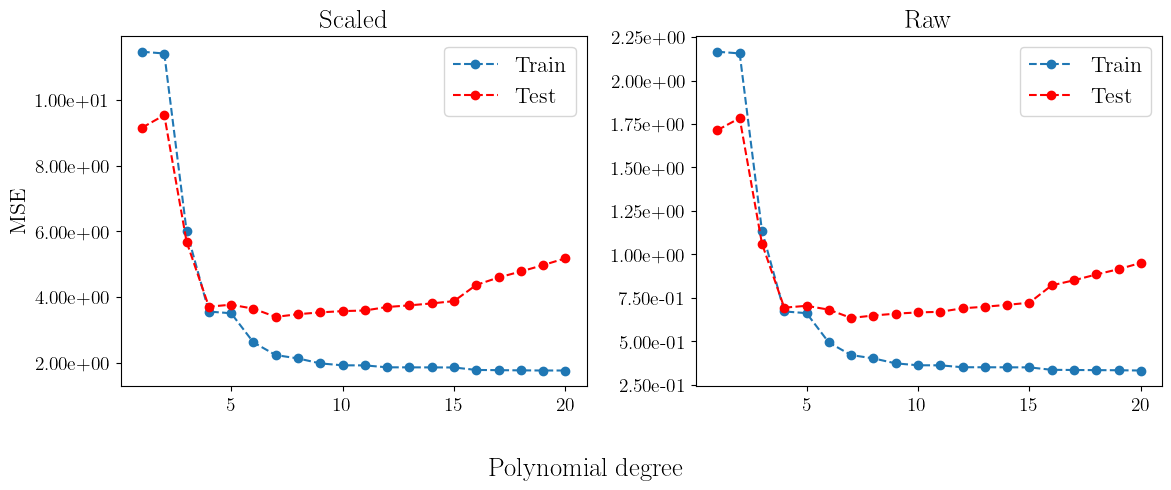

In [48]:
fig, axs = plt.subplots(1, 2, sharex=True, figsize = (12, 5))

# Plotting in grid
axs[0].plot(degrees, MSE_train_scaled, "--o", label = "Train")
axs[0].plot(degrees, MSE_test_scaled, "r--o", label = "Test")
axs[0].legend()
axs[0].set_title("Scaled")

#TODO only use scaled?
axs[1].plot(degrees, MSE_train_raw, "--o", label = "Train")
axs[1].plot(degrees, MSE_test_raw, "r--o", label = "Test")
axs[1].legend()
axs[1].set_title("Raw")

# Prettifying
## Formatting y-labels
axs[0].yaxis.set_major_formatter(FormatStrFormatter("%.2e"))
axs[1].yaxis.set_major_formatter(FormatStrFormatter("%.2e"))

## Axis labels
axs[0].set_ylabel('MSE')
fig.supxlabel('Polynomial degree')

plt.tight_layout()
plt.savefig("../figs/e_MSE_train_test.pdf")
plt.show()

In [ ]:
#TODO how recreate fig 2.11?
#TODO remove raw

### Plotting MSE, bias and variance as functions of polynomial degrees between $[1,10]$

In [14]:
N = 1000
x = np.arange(0, 1, 1/N).reshape(-1, 1) 
y = np.arange(0, 1, 1/N).reshape(-1, 1)
z = FrankeFunction(x, y) + np.random.normal(0, 0.1, (N, N))

n_boostraps = 100
degrees = range(1, 11)

error = np.zeros(len(degrees)); bias = np.zeros(len(degrees)); variance = np.zeros(len(degrees))
for i in range(len(degrees)):
    X = create_X(x, y, n = degrees[i])
    X_train, X_test, y_train, y_test = train_test_split(X, z, test_size = 0.2, random_state = seed)

    #TODO correct to only use scaled?
    scaler_X = StandardScaler().fit(X_train)
    X_train = scaler_X.transform(X_train)
    X_test = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    y_train = scaler_y.transform(y_train)
    y_test = scaler_y.transform(y_test)

    # The following (m x n_bootstraps) matrix holds the column vectors y_pred for each bootstrap iteration.
    y_pred = np.empty((y_test.shape[0], y_test.shape[1], n_boostraps))
    for j in range(n_boostraps):
        X_, y_ = resample(X_train, y_train)

        β = np.linalg.pinv(X_.T @ X_) @ X_.T @ y_

        # Evaluate the new model on the same test data each time.
        y_pred[:, :, j] = X_test @ β

    #TODO done correctly?
    error[i] = np.mean(np.mean((y_test[:, :, np.newaxis] - y_pred)**2, axis=2, keepdims=True))  # MSE on test set
    bias[i] = np.mean((y_test - np.mean(y_pred, axis=2, keepdims=True)[:, :, 0])**2)            # Model bias
    variance[i] = np.mean(np.var(y_pred, axis=2, keepdims=True))                                # Model variance

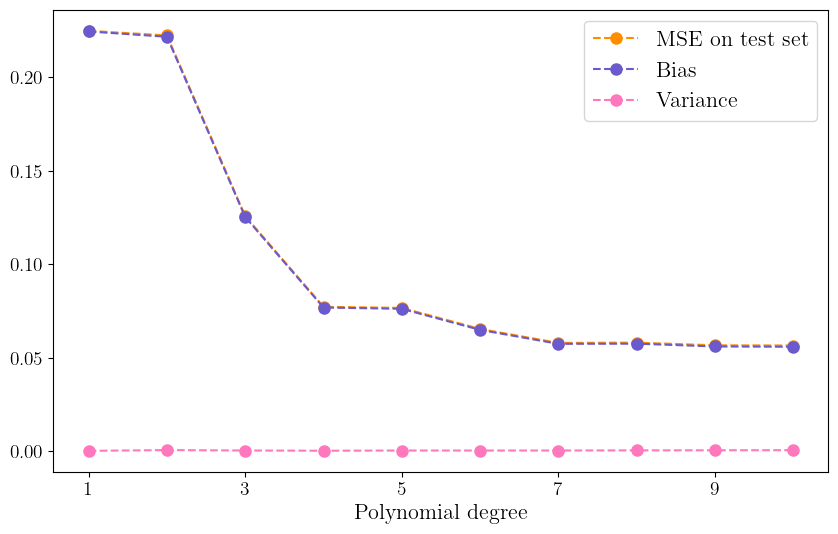

In [15]:
plt.figure(figsize = (10, 6))
plt.plot(degrees, error, label = "MSE on test set", linestyle = "--", marker = "o", markersize = 8, color = "#ff8d00")
plt.plot(degrees, bias, label = "Bias", linestyle = "--", marker = "o", markersize = 8, color = "slateblue")
plt.plot(degrees, variance, label = "Variance", linestyle = "--", marker = "o", markersize = 8, color = "#ff77bc")
plt.legend()
plt.xticks(degrees[::2])
plt.xlabel("Polynomial degree")
plt.show()

### Plotting MSE, bias and variance as functions of numbers of data points between $[50, 1000]$ for polynomial degree $10$

In [ ]:
N = range(50, 1001, 50)
n_boostraps = 100
degree = 10

error = np.zeros(len(N)); bias = np.zeros(len(N)); variance = np.zeros(len(N))
for i in range(len(N)):
    x = np.arange(0, 1, 1/N[i]).reshape(-1, 1) 
    y = np.arange(0, 1, 1/N[i]).reshape(-1, 1)
    z = FrankeFunction(x, y) + np.random.normal(0, 0.1, (N[i], N[i]))

    X = create_X(x, y, n = degrees[i])
    X_train, X_test, y_train, y_test = train_test_split(X, z, test_size = 0.2, random_state = seed)

    #TODO correct to only use scaled?
    scaler_X = StandardScaler().fit(X_train)
    X_train = scaler_X.transform(X_train)
    X_test = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    y_train = scaler_y.transform(y_train)
    y_test = scaler_y.transform(y_test)

    # The following (m x n_bootstraps) matrix holds the column vectors y_pred for each bootstrap iteration.
    y_pred = np.empty((y_test.shape[0], y_test.shape[1], n_boostraps))
    for j in range(n_boostraps):
        X_, y_ = resample(X_train, y_train)

        β = np.linalg.pinv(X_.T @ X_) @ X_.T @ y_

        # Evaluate the new model on the same test data each time.
        y_pred[:, :, j] = X_test @ β

    #TODO done correctly?
    error[i] = np.mean(np.mean((y_test[:, :, np.newaxis] - y_pred)**2, axis=2, keepdims=True))  # MSE on test set
    bias[i] = np.mean((y_test - np.mean(y_pred, axis=2, keepdims=True)[:, :, 0])**2)            # Model bias
    variance[i] = np.mean(np.var(y_pred, axis=2, keepdims=True))                                # Model variance

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(N, error, label = "MSE on test set", linestyle = "--", marker = "o", markersize = 8, color = "#ff8d00")
plt.plot(N, bias, label = "Bias", linestyle = "--", marker = "o", markersize = 8, color = "slateblue")
plt.plot(N, variance, label = "Variance", linestyle = "--", marker = "o", markersize = 8, color = "#ff77bc")
plt.legend()
plt.xticks(N[::2])
plt.xlabel("Number of data points")
plt.show()

In [ ]:
#TODO done correctly? fix so that it doesnt take so long
#TODO plot as function of number of bootstrap steps?
#TODO plot as function of test fraction?

## g)

### Dark matter simulation data at redshift $z\approx0$

In [16]:
with open("../data/darkmatter.txt", "r") as infile:
    params = infile.readline().split(",")
    box_unit, rho_unit, h, a = params[0].split(": ")[1], params[1].split(": ")[1], float(params[2].split(": ")[1]), float(params[3].split(": ")[1]) 
    y = np.array(infile.readline().split(), dtype = float)
    x = []; rho = []
    for line in infile:
        vals = line.split()
        x.append(float(vals[-1]))
        rho.append(np.array(vals[:-1], dtype = float))
x = np.array(x); rho = np.array(rho)
xx, yy = np.meshgrid(x, y)

#### Smoothing the data over $20\:\text{px}\times20\:\text{px}$ cubes

In [17]:
rho_sm = np.zeros(rho.shape)
idx_x = np.concatenate((np.zeros(10, dtype = int), range(len(rho)), -np.ones(10, dtype = int)))
idx_y = np.concatenate((np.zeros(10, dtype = int), range(len(rho[0])), -np.ones(10, dtype = int)))
for i in range(len(rho)):
    for j in range(len(rho[0])):
        rho_sm[i, j] = np.mean(rho[idx_x[i]:idx_x[i+20], idx_y[j]:idx_y[j+20]])

### Dark matter simulation data at redshift $z\approx12.88$

In [18]:
with open("../data/darkmatter_old.txt", "r") as infile:
    params = infile.readline().split(",")
    box_unit, rho_unit, h_old, a_old = params[0].split(": ")[1], params[1].split(": ")[1], float(params[2].split(": ")[1]), float(params[3].split(": ")[1]) 
    y_old = np.array(infile.readline().split(), dtype = float)
    x_old = []; rho_old = []
    for line in infile:
        vals = line.split()
        x_old.append(float(vals[-1]))
        rho_old.append(np.array(vals[:-1], dtype = float))
x_old = np.array(x_old); rho_old = np.array(rho_old)
xx_old, yy_old = np.meshgrid(x_old, y_old)

#### Smoothing the data over $20\:\text{px}\times20\:\text{px}$ cubes

In [19]:
rho_old_sm = np.zeros(rho_old.shape)
idx_x = np.concatenate((np.zeros(10, dtype = int), range(len(rho_old)), -np.ones(10, dtype = int)))
idx_y = np.concatenate((np.zeros(10, dtype = int), range(len(rho_old[0])), -np.ones(10, dtype = int)))
for i in range(len(rho_old)):
    for j in range(len(rho_old[0])):
        rho_old_sm[i, j] = np.mean(rho_old[idx_x[i]:idx_x[i+20], idx_y[j]:idx_y[j+20]])

### Making some plots for the report

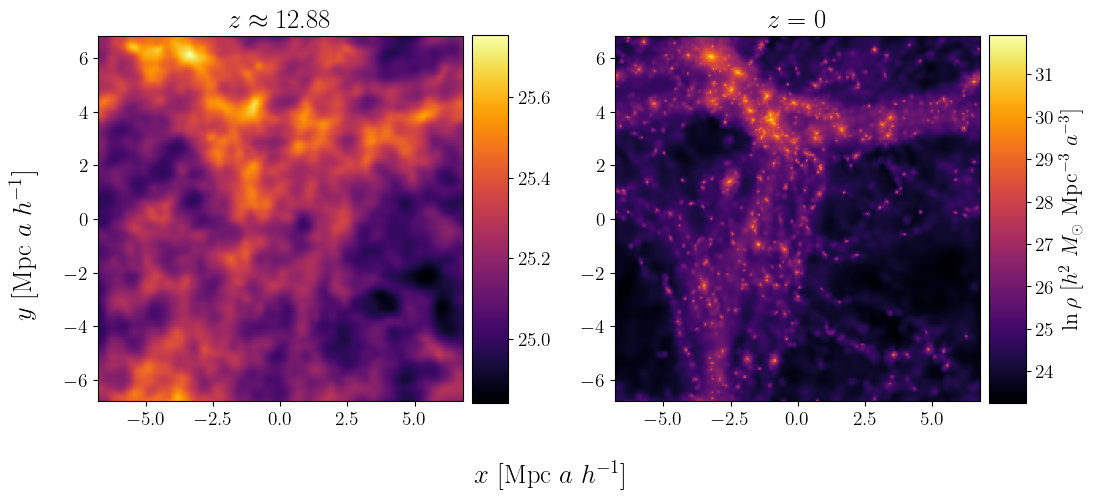

In [20]:
fig, axs = plt.subplots(1, 2, figsize = (11.25, 5))
im_old = axs[0].imshow(np.log(rho_old[::-1]), cmap = "inferno", interpolation = "nearest", extent = [np.min(x_old), np.max(x_old), np.min(y_old), np.max(y_old)])
im = axs[1].imshow(np.log(rho[::-1]), cmap = "inferno", interpolation = "nearest", extent = [np.min(x), np.max(x), np.min(y), np.max(y)])
axs[0].set_title(r"$z\approx\:$" + f"{1/a_old-1:.2f}")
axs[1].set_title(r"$z=0$")
plt.colorbar(im_old, ax = axs[0], pad = 0.02, shrink = 0.92, aspect = 10)
plt.colorbar(im, ax = axs[1], label = r"$\ln\rho$ [" + rho_unit + "]", pad = 0.02, shrink = 0.92, aspect = 10)
fig.supxlabel(r"$x$ [" + box_unit + "]")
fig.supylabel(r"$y$ [" + box_unit + "]")
plt.tight_layout()
plt.savefig("../figs/density_new_and_old.pdf")
plt.show()

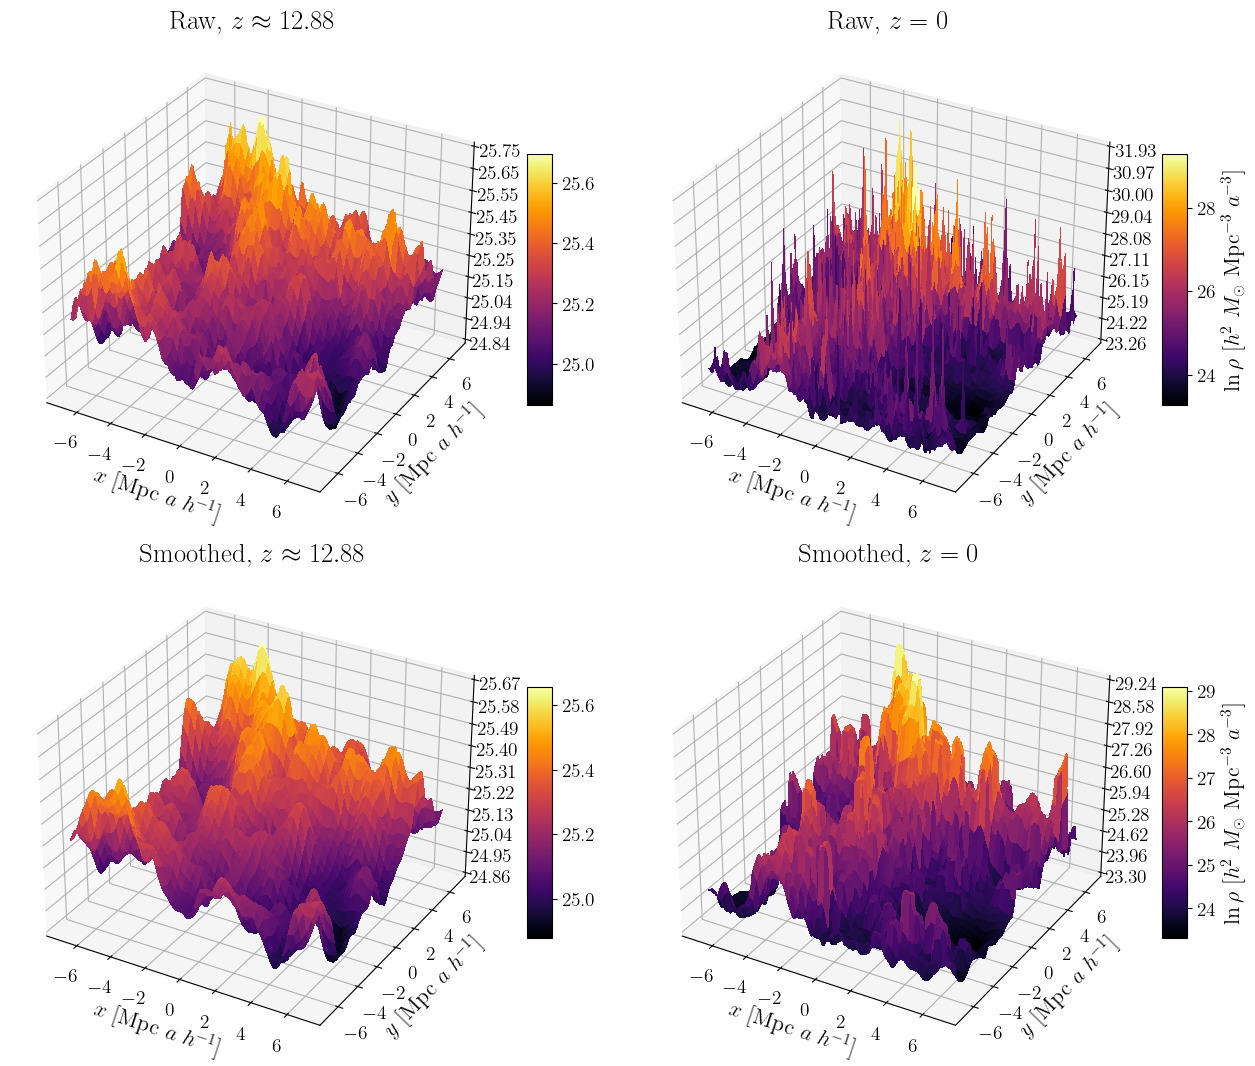

In [21]:
fig = plt.figure(figsize = (13, 11))
axs = [fig.add_subplot(221, projection = "3d"), fig.add_subplot(222, projection = "3d"), fig.add_subplot(223, projection = "3d"), fig.add_subplot(224, projection = "3d")]

surf_old = axs[0].plot_surface(xx_old, yy_old, np.log(rho_old), cmap = "inferno", linewidth = 0, antialiased = False)
surf = axs[1].plot_surface(xx, yy, np.log(rho), cmap = "inferno", linewidth = 0, antialiased = False)
surf_old_sm = axs[2].plot_surface(xx_old, yy_old, np.log(rho_old_sm), cmap = "inferno", linewidth = 0, antialiased = False)
surf_sm = axs[3].plot_surface(xx, yy, np.log(rho_sm), cmap = "inferno", linewidth = 0, antialiased = False)
titles = [r"Raw, $z\approx12.88$", r"Raw, $z=0$", r"Smoothed, $z\approx12.88$", r"Smoothed, $z=0$"]
for i in range(4):
    axs[i].zaxis.set_major_locator(LinearLocator(10))
    axs[i].zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
    axs[i].set_xlabel(r"$x$ [" + box_unit + "]")
    axs[i].set_ylabel(r"$y$ [" + box_unit + "]")
    axs[i].set_title(titles[i])
fig.colorbar(surf_old, shrink = 0.5, aspect = 10)
fig.colorbar(surf, shrink = 0.5, aspect = 10, label = r"$\ln\rho$ [" + rho_unit + "]")
fig.colorbar(surf_old_sm, shrink = 0.5, aspect = 10)
fig.colorbar(surf_sm, shrink = 0.5, aspect = 10, label = r"$\ln\rho$ [" + rho_unit + "]")
plt.tight_layout()
plt.savefig("../figs/density_surf_all.pdf")
plt.show()

### Repeating previous tasks using the dark matter data, starting with $z\approx12.88$

#### a)

In [22]:
MSE_raw = []
MSE_scaled = []
R2_raw = []
R2_scaled = []
β_raw_list = []
β_scaled_list = []

degrees = range(1, 21)
for degree in degrees:
    X = create_X(x_old, y_old, n=degree)
    X_train, X_test, y_train, y_test = train_test_split(X, np.log(rho_old), test_size=0.2, random_state=seed)

    # Raw
    β_raw = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train
    β_raw_list.append(β_raw)
    y_tilde_raw = X_train @ β_raw 
    y_pred_raw = X_test @ β_raw
    
    #TODO correct to use y_train for MSE and y_test for score?
    MSE_raw.append(MSE(y_train, y_tilde_raw))
    R2_raw.append(R2(y_test, y_pred_raw))
    
    # Scaled
    scaler_X = StandardScaler().fit(X_train)
    X_train_scaled = scaler_X.transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    y_train_scaled = scaler_y.transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    β_scaled = np.linalg.pinv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train_scaled
    β_scaled_list.append(β_scaled)
    y_tilde_scaled = X_train_scaled @ β_scaled 
    y_pred_scaled = X_test_scaled @ β_scaled
    
    MSE_scaled.append(MSE(y_train_scaled, y_tilde_scaled))
    R2_scaled.append(R2(y_test_scaled, y_pred_scaled))

MSE(R2_raw, R_scaled) = 1.18e+08


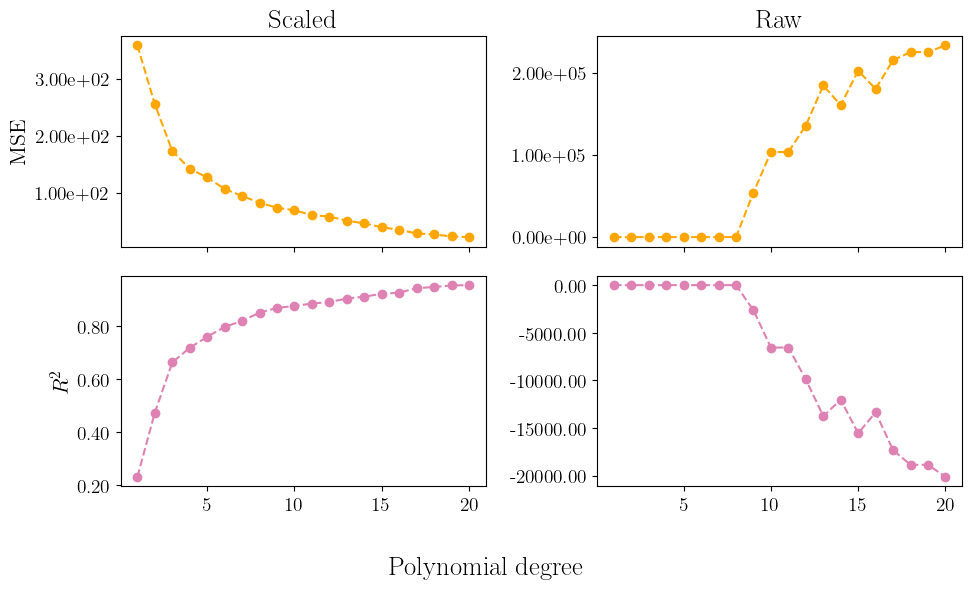

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 2, sharex=True, figsize = (10, 6))

# Plotting in grid
ax1[0].plot(degrees, MSE_scaled, "--o", color = "#ffa700")
ax1[0].set_title("Scaled")

ax1[1].plot(degrees, MSE_raw, "--o", color = "#ffa700")
ax1[1].set_title("Raw")

ax2[0].plot(degrees, R2_scaled, "--o", color = "#de82b4")
ax2[1].plot(degrees, R2_raw, "--o", color = "#de82b4")

print(f'MSE(R2_raw, R_scaled) = {MSE(np.array(R2_raw), np.array(R2_scaled)):.2e}') # Almost equal

# Prettifying
## Formatting y-labels
ax1[0].yaxis.set_major_formatter(FormatStrFormatter("%.2e"))
ax1[1].yaxis.set_major_formatter(FormatStrFormatter("%.2e"))

ax2[0].yaxis.set_major_formatter(FormatStrFormatter("%.2f%%"))
ax2[1].yaxis.set_major_formatter(FormatStrFormatter("%.2f%%"))

## Axis labels
ax1[0].set_ylabel('MSE')
ax2[0].set_ylabel(r'$R^2$')
fig.supxlabel('Polynomial degree')

# plt.suptitle("Comparing Error in Scaled and Raw Data")
plt.tight_layout()
plt.savefig("../figs/g_error_scaled_vs_raw_old.pdf")
plt.show()

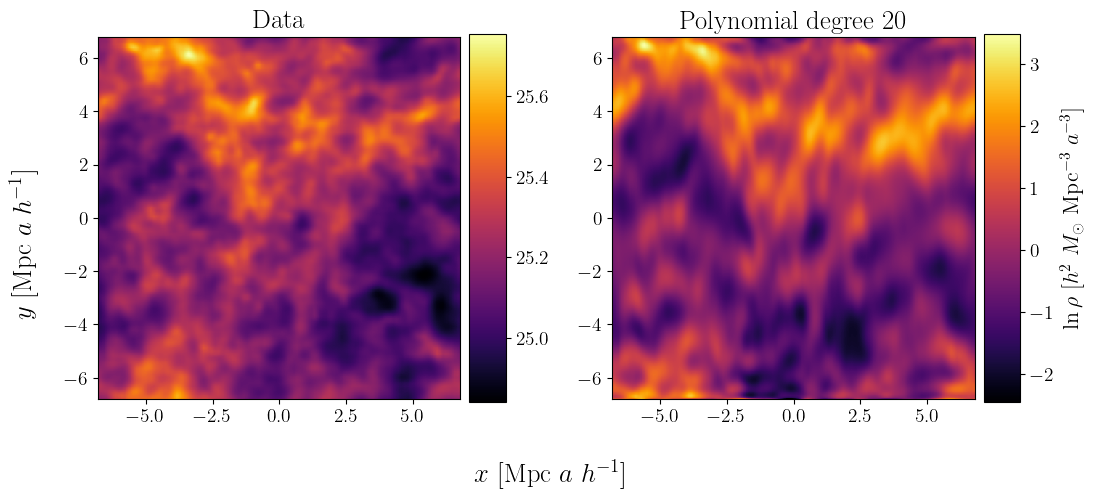

In [24]:
#TODO scale back

fig, axs = plt.subplots(1, 2, figsize = (11.25, 5))
im = axs[0].imshow(np.log(rho_old[::-1]), cmap = "inferno", interpolation = "nearest", extent = [np.min(x), np.max(x), np.min(y), np.max(y)])
im_fit = axs[1].imshow((scaler_X.transform(X) @ β_scaled)[::-1], cmap = "inferno", interpolation = "nearest", extent = [np.min(x), np.max(x), np.min(y), np.max(y)])
axs[0].set_title(r"Data")
axs[1].set_title(r"Polynomial degree 20")
plt.colorbar(im, ax = axs[0], pad = 0.02, shrink = 0.92, aspect = 10)
plt.colorbar(im_fit, ax = axs[1], label = r"$\ln\rho$ [" + rho_unit + "]", pad = 0.02, shrink = 0.92, aspect = 10)
fig.supxlabel(r"$x$ [" + box_unit + "]")
fig.supylabel(r"$y$ [" + box_unit + "]")
plt.tight_layout()
plt.savefig("../figs/density_old_w_20.pdf")
plt.show()

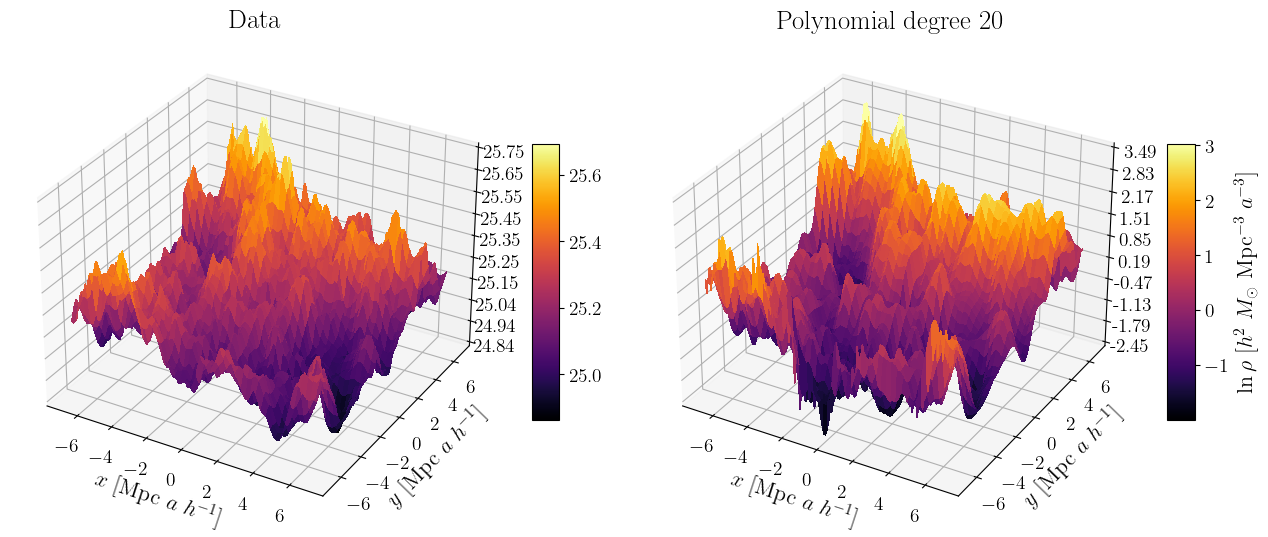

In [26]:
fig = plt.figure(figsize = (13, 6))
axs = [fig.add_subplot(121, projection = "3d"), fig.add_subplot(122, projection = "3d")]

surf_old = axs[0].plot_surface(xx_old, yy_old, np.log(rho_old), cmap = "inferno", linewidth = 0, antialiased = False)
surf_old_fit = axs[1].plot_surface(xx_old, yy_old, scaler_X.transform(X) @ β_scaled, cmap = "inferno", linewidth = 0, antialiased = False)
titles = [r"Data", r"Polynomial degree 20"]
for i in range(2):
    axs[i].zaxis.set_major_locator(LinearLocator(10))
    axs[i].zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
    axs[i].set_xlabel(r"$x$ [" + box_unit + "]")
    axs[i].set_ylabel(r"$y$ [" + box_unit + "]")
    axs[i].set_title(titles[i])
fig.colorbar(surf_old, shrink = 0.5, aspect = 10)
fig.colorbar(surf_old_fit, shrink = 0.5, aspect = 10, label = r"$\ln\rho$ [" + rho_unit + "]")
plt.tight_layout()
plt.savefig("../figs/density_surf_old_w_20.pdf")
plt.show()

#### b)

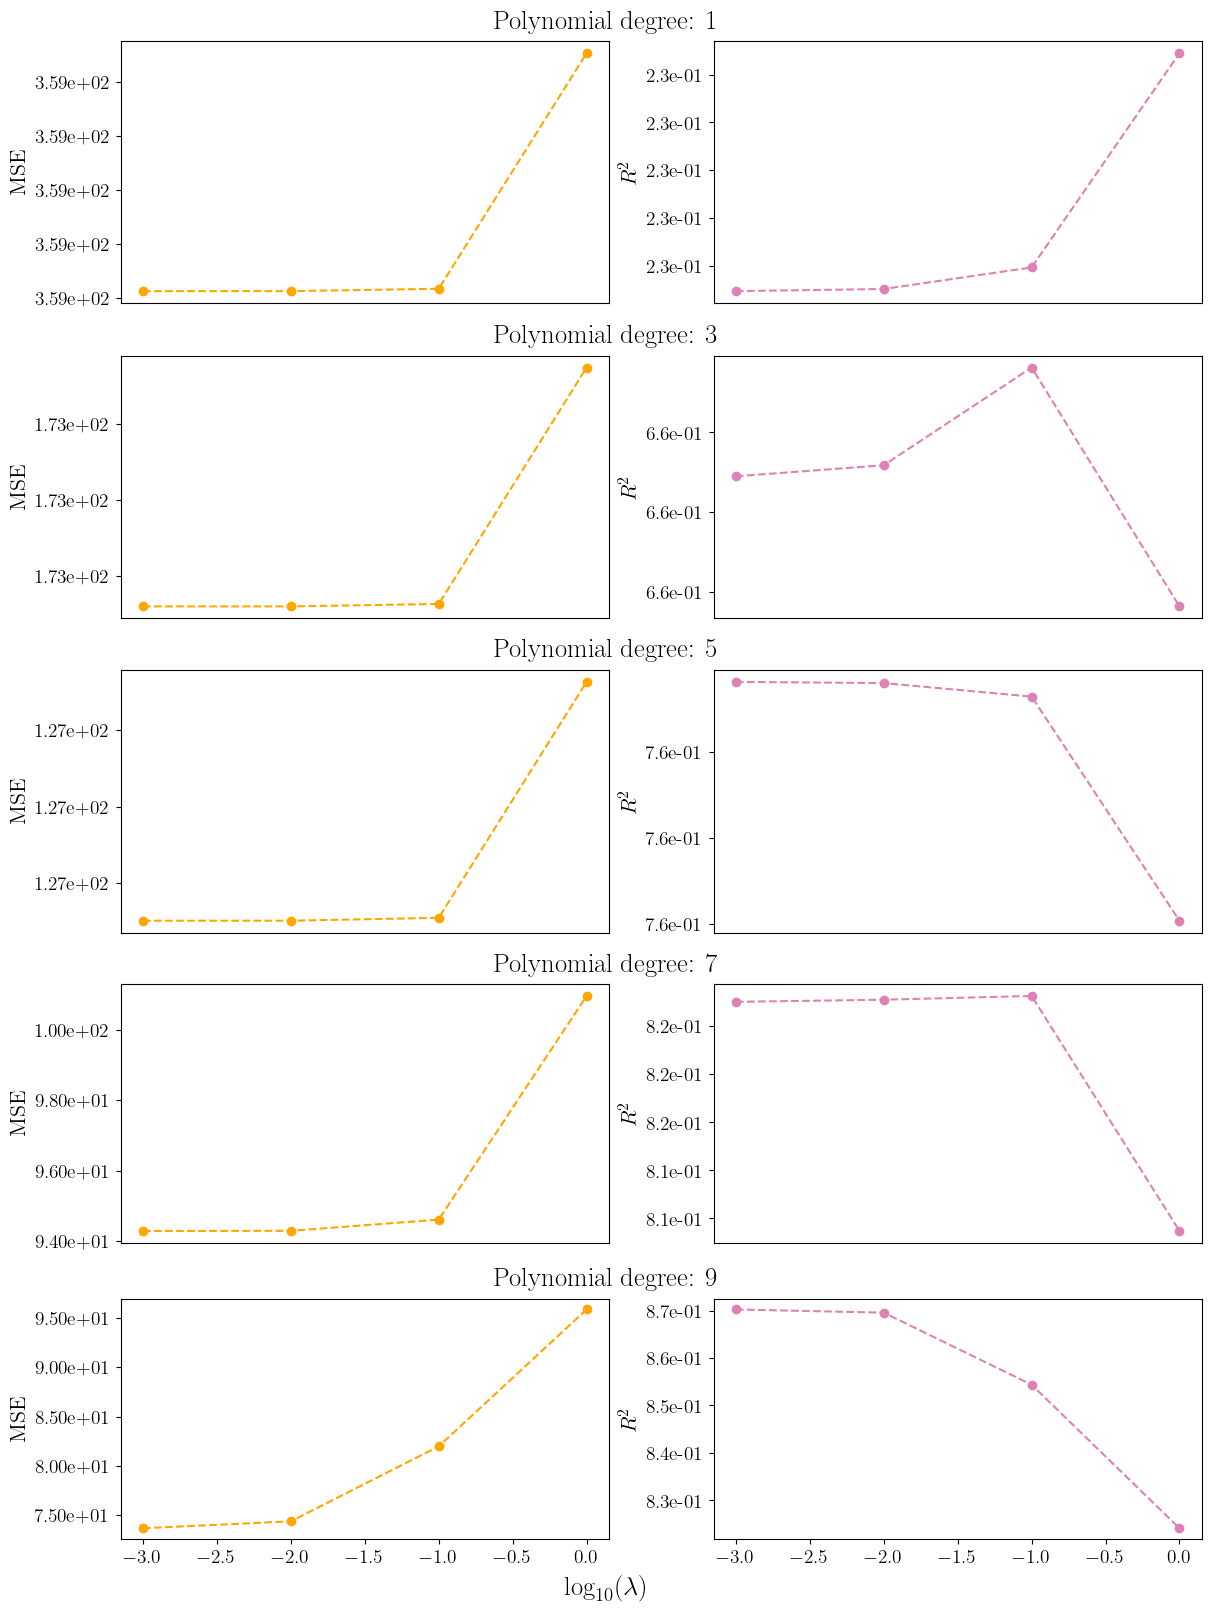

In [35]:
lambdas = [0.001, 0.01, 0.1, 1.0]
degrees = range(1, 11, 2)

MSE_ridge_scaled = np.zeros([len(degrees), len(lambdas)])
R2_ridge_scaled = np.zeros([len(degrees), len(lambdas)])

fig = plt.figure(figsize=(12,16), constrained_layout=True)
subfigs = fig.subfigures(5, 1)

for i in range(len(degrees)):
    X = create_X(x_old, y_old, n=degrees[i])
    X_train, X_test, y_train, y_test = train_test_split(X, np.log(rho_old), test_size=0.2, random_state=seed)
    
    # Scaling the data
    scaler_X = StandardScaler().fit(X_train)
    X_train_scaled = scaler_X.transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    y_train_scaled = scaler_y.transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    for j in range(len(lambdas)):
        β_scaled = np.linalg.pinv(X_train_scaled.T @ X_train_scaled + lambdas[j]*np.eye(X_train.shape[1])) @ X_train_scaled.T @ y_train_scaled
        y_tilde_scaled = X_train_scaled @ β_scaled 
        y_pred_scaled = X_test_scaled @ β_scaled
        
        MSE_ridge_scaled[i,j] = MSE(y_train_scaled, y_tilde_scaled)
        R2_ridge_scaled[i,j] = R2(y_test_scaled, y_pred_scaled)

    subfig = subfigs[i]
    axs = subfig.subplots(1, 2)
    axs[0].plot(np.log10(lambdas), MSE_ridge_scaled[i], '--o', color = "#ffa700", label=f'MSE Ridge Polynomial {degrees[i]}')
    axs[1].plot(np.log10(lambdas), R2_ridge_scaled[i], '--o', color = "#de82b4", label=r'$R^2$ ' + f'Ridge Polynomial {degrees[i]}')

    subfig.suptitle(f'Polynomial degree: {degrees[i]}')
    axs[0].yaxis.set_major_formatter(FormatStrFormatter("%.2e"))
    axs[1].yaxis.set_major_formatter(FormatStrFormatter("%.1e%%"))

    axs[0].set_ylabel('MSE')
    axs[1].set_ylabel(r'$R^2$')

    if i != len(degrees) - 1:
        axs[0].set_xticks([])
        axs[1].set_xticks([])

fig.supxlabel(r'$\log_{10}(\lambda)$')
plt.savefig("../figs/g_MSE_R2_Ridge.pdf")
plt.show()

In [ ]:
#TODO comment
#TODO check that MSE is calculated correctly

#### c)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.674e+01, tolerance: 4.000e-02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.709e+01, tolerance: 4.000e-02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

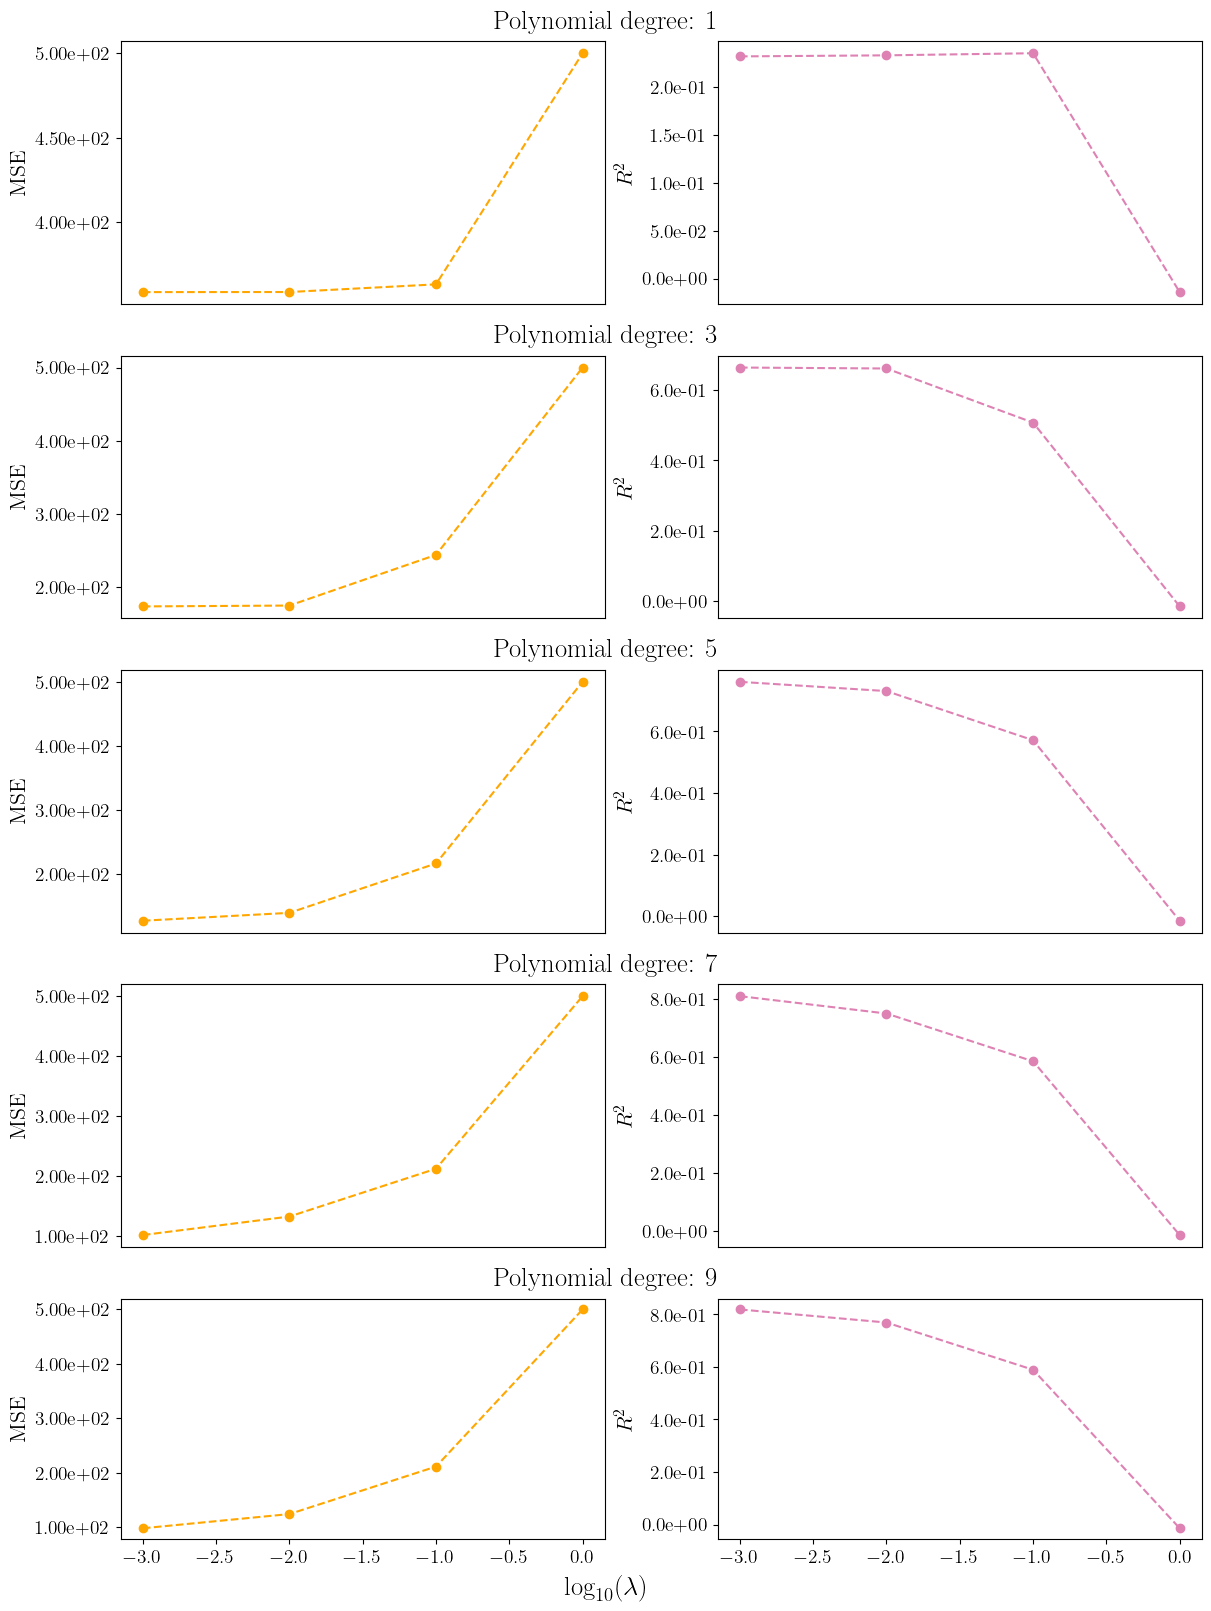

In [36]:
lambdas = [0.001, 0.01, 0.1, 1.0]
degrees = range(1, 11, 2)

MSE_lasso_scaled = np.zeros([len(degrees), len(lambdas)])
R2_lasso_scaled = np.zeros([len(degrees), len(lambdas)])
β_lasso_scaled_list = np.zeros([len(degrees), len(lambdas)])

fig = plt.figure(figsize=(12,16), constrained_layout=True)
subfigs = fig.subfigures(5, 1)

for i in range(len(degrees)):
    X = create_X(x_old, y_old, n=degrees[i])
    X_train, X_test, y_train, y_test = train_test_split(X, np.log(rho_old), test_size=0.2, random_state=seed)
    
    # Scaling the data
    scaler_X = StandardScaler().fit(X_train)
    X_train_scaled = scaler_X.transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    y_train_scaled = scaler_y.transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    for j in range(len(lambdas)):
        RegLasso = linear_model.Lasso(lambdas[j], fit_intercept=True)
        RegLasso.fit(X_train_scaled, y_train_scaled)
        y_tilde_lasso = RegLasso.predict(X_train_scaled)
        y_pred_lasso = RegLasso.predict(X_test_scaled)

        MSE_lasso_scaled[i,j] = MSE(y_train_scaled, y_tilde_lasso)
        R2_lasso_scaled[i,j] = R2(y_test_scaled, y_pred_lasso)

    subfig = subfigs[i]
    axs = subfig.subplots(1, 2)
    axs[0].plot(np.log10(lambdas), MSE_lasso_scaled[i], '--o', color = "#ffa700", label=f'MSE Lasso Polynomial {degrees[i]}')
    axs[1].plot(np.log10(lambdas), R2_lasso_scaled[i], '--o', color = "#de82b4", label=r'$R^2$ ' + f'Lasso Polynomial {degrees[i]}')

    subfig.suptitle(f'Polynomial degree: {degrees[i]}')
    axs[0].yaxis.set_major_formatter(FormatStrFormatter("%.2e"))
    axs[1].yaxis.set_major_formatter(FormatStrFormatter("%.1e%%"))

    axs[0].set_ylabel('MSE')
    axs[1].set_ylabel(r'$R^2$')

    if i != len(degrees) - 1:
        axs[0].set_xticks([])
        axs[1].set_xticks([])

fig.supxlabel(r'$\log_{10}(\lambda)$')
plt.savefig("../figs/g_MSE_R2_Lasso.pdf")
plt.show()

In [ ]:
#TODO comment
#TODO check that MSE is calculated correctly

#### e)

#### f)

### Repeating for $z=0$

#### a)

In [27]:
MSE_raw = []
MSE_scaled = []
R2_raw = []
R2_scaled = []
β_raw_list = []
β_scaled_list = []

degrees = range(1, 21)
for degree in degrees:
    X = create_X(x, y, n=degree)
    X_train, X_test, y_train, y_test = train_test_split(X, np.log(rho), test_size=0.2, random_state=seed)

    # Raw
    β_raw = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train
    β_raw_list.append(β_raw)
    y_tilde_raw = X_train @ β_raw 
    y_pred_raw = X_test @ β_raw
    
    #TODO correct to use y_train for MSE and y_test for score?
    MSE_raw.append(MSE(y_train, y_tilde_raw))
    R2_raw.append(R2(y_test, y_pred_raw))
    
    # Scaled
    scaler_X = StandardScaler().fit(X_train)
    X_train_scaled = scaler_X.transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    y_train_scaled = scaler_y.transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    β_scaled = np.linalg.pinv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train_scaled
    β_scaled_list.append(β_scaled)
    y_tilde_scaled = X_train_scaled @ β_scaled 
    y_pred_scaled = X_test_scaled @ β_scaled
    
    MSE_scaled.append(MSE(y_train_scaled, y_tilde_scaled))
    R2_scaled.append(R2(y_test_scaled, y_pred_scaled))

MSE(R2_raw, R_scaled) = 4.01e+04


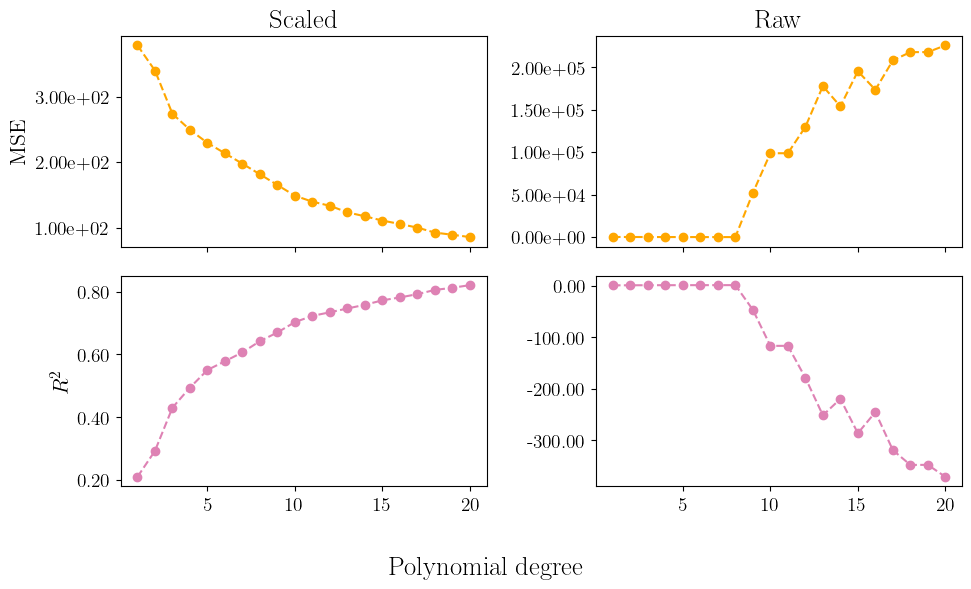

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 2, sharex=True, figsize = (10, 6))

# Plotting in grid
ax1[0].plot(degrees, MSE_scaled, "--o", color = "#ffa700")
ax1[0].set_title("Scaled")

ax1[1].plot(degrees, MSE_raw, "--o", color = "#ffa700")
ax1[1].set_title("Raw")

ax2[0].plot(degrees, R2_scaled, "--o", color = "#de82b4")
ax2[1].plot(degrees, R2_raw, "--o", color = "#de82b4")

print(f'MSE(R2_raw, R_scaled) = {MSE(np.array(R2_raw), np.array(R2_scaled)):.2e}') # Almost equal

# Prettifying
## Formatting y-labels
ax1[0].yaxis.set_major_formatter(FormatStrFormatter("%.2e"))
ax1[1].yaxis.set_major_formatter(FormatStrFormatter("%.2e"))

ax2[0].yaxis.set_major_formatter(FormatStrFormatter("%.2f%%"))
ax2[1].yaxis.set_major_formatter(FormatStrFormatter("%.2f%%"))

## Axis labels
ax1[0].set_ylabel('MSE')
ax2[0].set_ylabel(r'$R^2$')
fig.supxlabel('Polynomial degree')

# plt.suptitle("Comparing Error in Scaled and Raw Data")
plt.tight_layout()
plt.savefig("../figs/g_error_scaled_vs_raw.pdf")
plt.show()

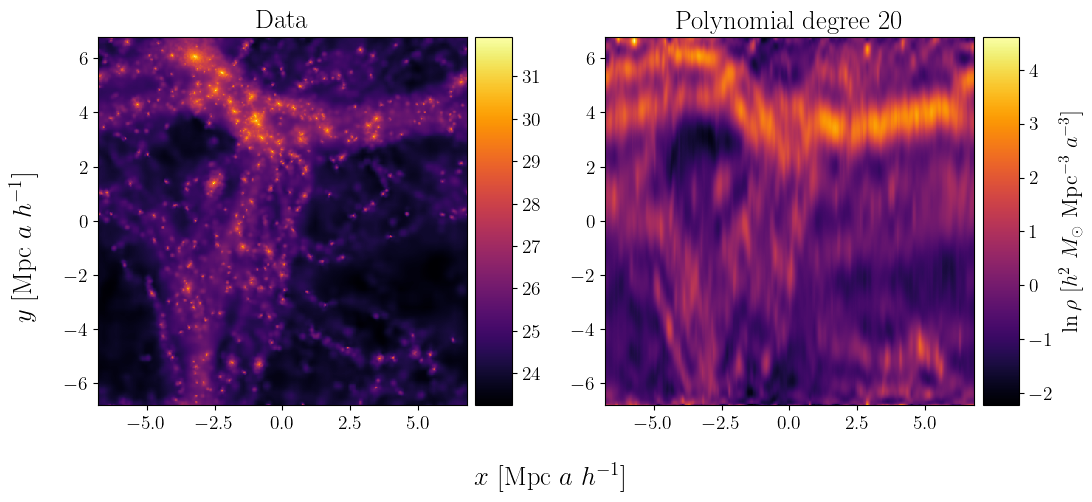

In [29]:
#TODO scale back

fig, axs = plt.subplots(1, 2, figsize = (11.25, 5))
im = axs[0].imshow(np.log(rho[::-1]), cmap = "inferno", interpolation = "nearest", extent = [np.min(x), np.max(x), np.min(y), np.max(y)])
im_fit = axs[1].imshow((scaler_X.transform(X) @ β_scaled)[::-1], cmap = "inferno", interpolation = "nearest", extent = [np.min(x), np.max(x), np.min(y), np.max(y)])
axs[0].set_title(r"Data")
axs[1].set_title(r"Polynomial degree 20")
plt.colorbar(im, ax = axs[0], pad = 0.02, shrink = 0.92, aspect = 10)
plt.colorbar(im_fit, ax = axs[1], label = r"$\ln\rho$ [" + rho_unit + "]", pad = 0.02, shrink = 0.92, aspect = 10)
fig.supxlabel(r"$x$ [" + box_unit + "]")
fig.supylabel(r"$y$ [" + box_unit + "]")
plt.tight_layout()
plt.savefig("../figs/density_w_20.pdf")
plt.show()

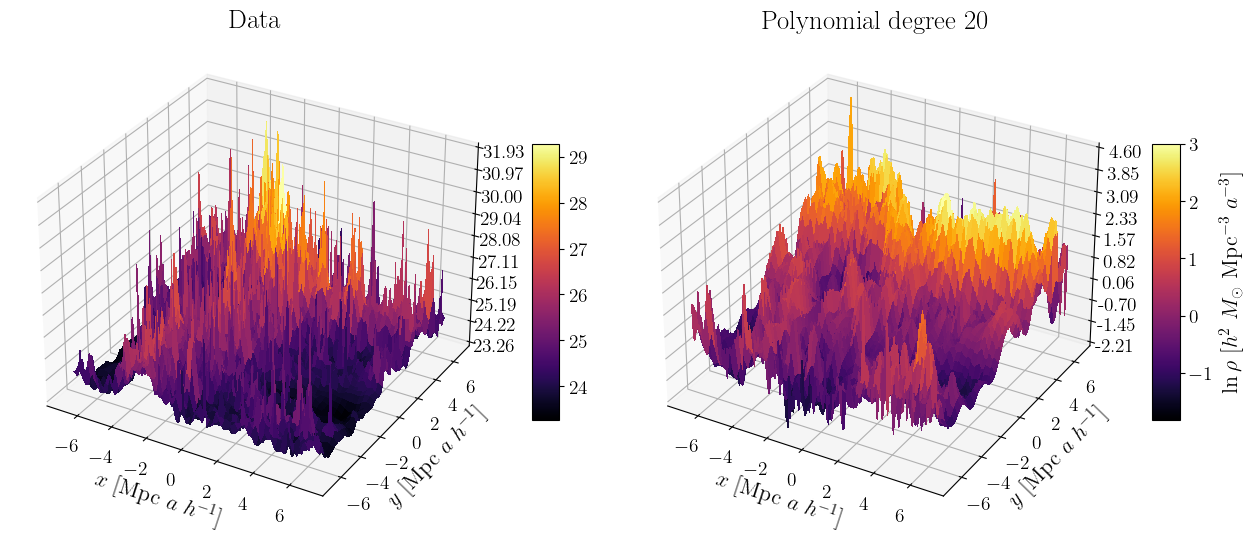

In [31]:
fig = plt.figure(figsize = (13, 6))
axs = [fig.add_subplot(121, projection = "3d"), fig.add_subplot(122, projection = "3d")]

surf = axs[0].plot_surface(xx, yy, np.log(rho), cmap = "inferno", linewidth = 0, antialiased = False)
surf_fit = axs[1].plot_surface(xx, yy, scaler_X.transform(X) @ β_scaled, cmap = "inferno", linewidth = 0, antialiased = False)
titles = [r"Data", r"Polynomial degree 20"]
for i in range(2):
    axs[i].zaxis.set_major_locator(LinearLocator(10))
    axs[i].zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
    axs[i].set_xlabel(r"$x$ [" + box_unit + "]")
    axs[i].set_ylabel(r"$y$ [" + box_unit + "]")
    axs[i].set_title(titles[i])
fig.colorbar(surf, shrink = 0.5, aspect = 10)
fig.colorbar(surf_fit, shrink = 0.5, aspect = 10, label = r"$\ln\rho$ [" + rho_unit + "]")
plt.tight_layout()
plt.savefig("../figs/density_surf_w_20.pdf")
plt.show()

In [ ]:
#TODO plot fit
#TODO merge from main, use functions instead